In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
customer_invoice = pd.read_csv('../data/customer_invoice.csv')
customer_invoice.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date,Area / Locality,...,Total Amt Wtd Tax.,Total Value,User ID,Invoice Day,Invoice Month,Invoice Year,Day of the week,Has Insurance,Is Dead,cluster
0,31,1,Retail,Camp-Outdoor,Unknown,Unknown,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3
1,32,2,Retail,Reference-Customer,Unknown,Unknown,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2,34,4,Retail,Reference-Customer,Unknown,Married,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,35,5,Retail,Reference-Customer,Unknown,Unknown,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
4,42,7,Retail,Just Dial/Other helpline,Unknown,Unknown,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3


In [30]:
plt.rcParams.update({'font.size': 15})

In [3]:
customer_invoice.columns

Index(['Business Partner', 'Customer No.', 'Partner Type', 'Data Origin',
       'Title', 'Marital Status', 'Occupation', 'Date of Birth', 'Death date',
       'Area / Locality', 'CITY', 'Cash /Cashless Type', 'Claim No.',
       'Cust Type', 'District', 'Expiry Date', 'Gate Pass Date',
       'Gate Pass Time', 'Insurance Company', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model', 'ODN No.',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Service Advisor Name', 'Technician Name', 'Total Amt Wtd Tax.',
       'Total Value', 'User ID', 'Invoice Day', 'Invoice Month',
       'Invoice Year', 'Day of the week', 'Has Insurance', 'Is Dead',
       'cluster'],
      dtype='object')

Text(0.5, 0, 'Customer Age')

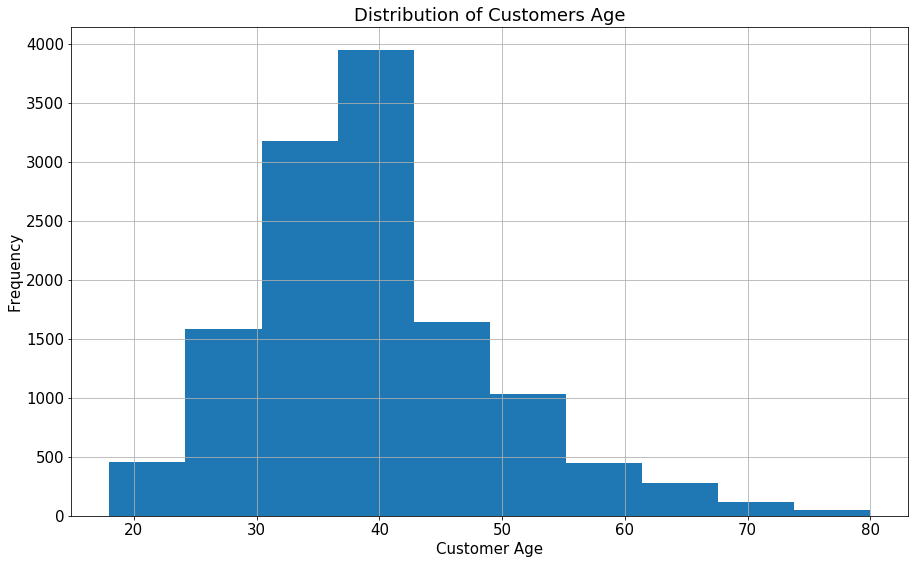

In [34]:
#get customers age distribution

now = pd.Timestamp('now')

customer_invoice['Date of Birth'] = pd.to_datetime(customer_invoice['Date of Birth'], errors = 'coerce')

customer_invoice['Date of Birth'] = customer_invoice['Date of Birth'].where(customer_invoice['Date of Birth'] < now, customer_invoice['Date of Birth'] -  np.timedelta64(100, 'Y')) 

customer_invoice['age'] = (now - customer_invoice['Date of Birth'] ).astype('<m8[Y]') 

customer_age = customer_invoice[customer_invoice['age'] >=18.0]['age']
customer_age = customer_age[customer_age <=80]

plt.figure(figsize=(15,9))
plt.title('Distribution of Customers Age')
customer_age.hist()
plt.ylabel('Frequency')
plt.xlabel('Customer Age')

In [39]:
customer_age = customer_invoice[customer_invoice['age'].notnull()]
customer_age = customer_age[customer_age['age']>=18]
customer_age = customer_age[customer_age['age']<=80]

In [40]:
customer_age.shape

(12712, 54)

In [60]:
customer_age['age_group'] = pd.cut(customer_age.age,[18.0,25.0,35.0,50.0,60.0,70.0,80.0])

In [61]:
customer_age.groupby('age_group')['Total Amt Wtd Tax.'].sum()

age_group
(18.0, 25.0]    0.0
(25.0, 35.0]    0.0
(35.0, 50.0]    0.0
(50.0, 60.0]    0.0
(60.0, 70.0]    0.0
(70.0, 80.0]    0.0
Name: Total Amt Wtd Tax., dtype: float64

In [59]:
customer_invoice['Total Amt Wtd Tax.'].notnull().sum()

19727

In [64]:
customer_data = pd.read_csv('../data/customer_data.csv')
invoice_data = pd.read_csv('../data/invoice_data.csv')

In [69]:
customer_invoice_with_indicator = customer_data.merge(invoice_data, on='Customer No.', how='left', sort=False, indicator=True)

In [72]:
customer_invoice_with_indicator['_merge'].value_counts()

left_only     551689
both           19727
right_only         0
Name: _merge, dtype: int64